In [338]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np
from scipy import stats
import plotly.graph_objects as go

In [2]:
my_top_artists_df=pd.read_csv(r"C:\Users\Mbtpem\Jupyter Notebook Projects\my_spotify\my_top_artists_df.csv",index_col=0)
my_top_tracks_df=pd.read_csv(r"C:\Users\Mbtpem\Jupyter Notebook Projects\my_spotify\my_top_tracks_df.csv",index_col=0)
tracks_df=pd.read_csv(r"C:\Users\Mbtpem\Jupyter Notebook Projects\my_spotify\tracks_df.csv",index_col=0)
artists_df=pd.read_csv(r"C:\Users\Mbtpem\Jupyter Notebook Projects\my_spotify\artists_df.csv",index_col=0)
artists_songs_df=pd.read_csv(r"C:\Users\Mbtpem\Jupyter Notebook Projects\my_spotify\artists_songs_df.csv",index_col=0)

# analysis

## how many songs were realesd each year?
note that this is effected by the way the dataset was created. for exemple you can see that the drop after 2020 is because the  dateset I found online is only up to april 2021 and my dataset is around 250 songs from each year between 1950-2024.

but you can say that the number of songs every year has been increasing overall in this dataset.

In [3]:
count_songs_years_df=tracks_df.groupby("release_year")["song_id"].count()

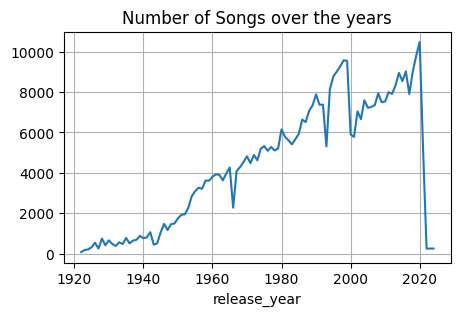

In [322]:
plt.figure(figsize=(5, 3))
plt.title('Number of Songs over the years')
sns.lineplot(x=count_songs_years_df.index,y=count_songs_years_df.values)
plt.grid(True)
plt.show()

## the explicit coloumn
Certain songs have parental advisory label associated with them indicating the song contains adult content which may not be suitable for children. Let's see how many songs in the dataset have advisory label associated with them through the years.

we will compre precentege of songs with explicit labal out of the total number of songs realesd that year

### Songs with Parental Advisory over the years

In [5]:
total_counts = tracks_df.groupby('release_year').size()
explicit_counts = tracks_df[tracks_df['explicit'] == True].groupby('release_year').size()
df_counts = pd.DataFrame({
    'total': total_counts,
    'explicit': explicit_counts
}).fillna(0)
df_counts['percentage_explicit'] = (df_counts['explicit'] / df_counts['total']) * 100
df_counts = df_counts.reset_index()

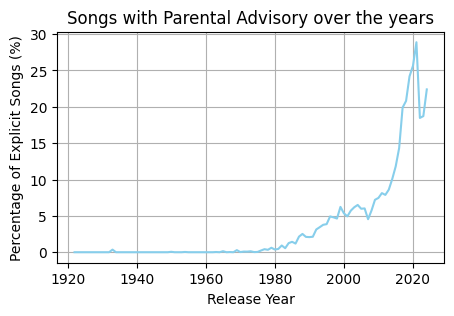

In [6]:
plt.figure('position', figsize=(5, 3))
plt.title('Songs with Parental Advisory over the years')
sns.lineplot(data=df_counts, x='release_year', y='percentage_explicit', color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Percentage of Explicit Songs (%)')
plt.grid(True)

Since the percentage of songs with explicit content each year seems to be rising, I wonder if they are also more popular.

### effect of explicit content on the popularity of the song

**Understanding the Data:**

From Spotify's documentation: 

"The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by an algorithm and is based, for the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past."

This means that the release year will probably affect the popularity of a song since a new song with a lot of streams now will have a higher score than an old song that had more streams years ago but is now forgotten. In other words, popularity is not an "all-time popularity" or "total number of streams" but the current popularity of the song. Since most of our data is from 2021, it reflects the 2021 popularity score.

#### avg popularity and distribution of popularity Values

In [300]:
mean_popularity=tracks_df["popularity"].mean()

In [301]:
mean_popularity

29.735680554539876

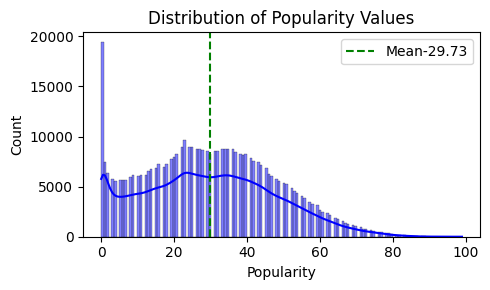

In [302]:
count_songs_pop_df=tracks_df[["song_id","popularity"]]
plt.figure(figsize=(5, 3))
sns.histplot(data=count_songs_pop_df, x='popularity', kde=True, color='blue')
plt.axvline(mean_popularity, color='green', linestyle='--', label='Mean-29.73')
plt.title('Distribution of Popularity Values')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

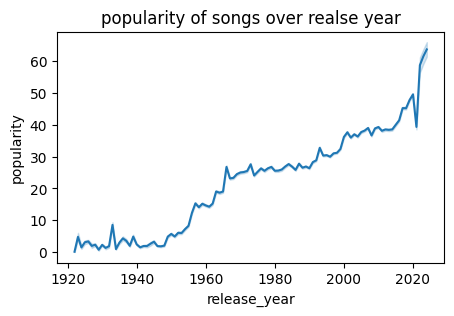

In [323]:
plt.figure(figsize=(5,3))
sns.lineplot(data=tracks_df, x="release_year",y="popularity")
plt.title("popularity of songs over realse year")
plt.show()

#### explicit vs non-explicit

##### avg popularity and distribution of popularity Values
let's do the same on the explicit songs and the non explicit songs

In [10]:
true_mean = tracks_df[tracks_df['explicit'] == True]['popularity'].mean()
false_mean = tracks_df[tracks_df['explicit'] == False]['popularity'].mean()
print(f"Mean for explicit: {true_mean}, Mean for non-explicit: {false_mean}")

Mean for explicit: 47.37118497466947, Mean for non-explicit: 28.732883193045076


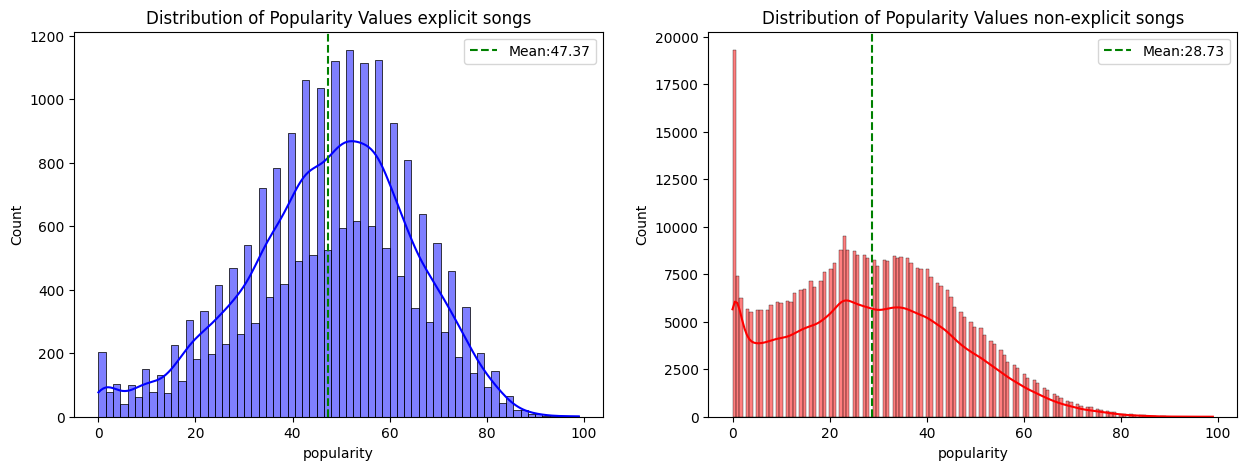

In [309]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.histplot(tracks_df[tracks_df['explicit'] == True]['popularity'], kde=True, color='blue', alpha=0.5 ,ax=ax[0])
ax[0].axvline(true_mean, color='green', linestyle='--', label=f"Mean:{true_mean:.2f}")
ax[0].set_title('Distribution of Popularity Values explicit songs')
ax[0].legend()
sns.histplot(tracks_df[tracks_df['explicit'] == False]['popularity'], kde=True, color='red', alpha=0.5,ax=ax[1])
ax[1].axvline(false_mean, color='green', linestyle='--', label=f"Mean:{false_mean:.2f}")
ax[1].set_title('Distribution of Popularity Values non-explicit songs')
ax[1].legend()

plt.show()

The mean popularity of explicit songs seems to be higher. Note that there are many more non-explicit songs in the database than explicit ones, which might affect the result.

We can also see that the explicit songs have a normal distribution of popularity, suggesting that it should be okay to compare the mean values even if there is much less data.

Since there were no explicit songs in the early years, I think it makes sense to compare the average popularity only from around when they appeared.

Additionally, there are a lot of songs with a score of 0 in the database. I don’t think they are relevant because they are songs with no exposure at all, so I can’t determine if the explicit label affects popularity from them.

In [214]:
my_df =  tracks_df.loc[(tracks_df['popularity'] > 0) & (tracks_df['release_year']>1964)]

In [13]:
my_true_mean = my_df.loc[(tracks_df['explicit'] == True)]['popularity'].mean()
my_false_mean = my_df.loc[(tracks_df['explicit'] == False)]['popularity'].mean()
print(f"Mean for explicit: {true_mean}, Mean for non-explicit: {false_mean}")

Mean for True: 47.37118497466947, Mean for False: 28.732883193045076


The average popularity score of explicit songs is still higher, which may suggest that songs with explicit content were more popular and received more streams in 2021.

I asked an AI to help me compare two data sets with a big difference in sample sizes. I will try to understand those tests and concepts later.

Bootstrapping is the only method I currently understand. It involves repeatedly comparing equal-sized samples from both groups, getting the average of those sample groups, comparing them, and then taking the average of all the results to find the mean difference.

In [14]:
# 1. Welch's t-test
def welch_ttest(df):
    explicit = df[df['explicit'] == True]['popularity']
    non_explicit = df[df['explicit'] == False]['popularity']
    t_stat, p_value = stats.ttest_ind(explicit, non_explicit, equal_var=False)
    return t_stat, p_value

# 2. Mann-Whitney U test
def mann_whitney(df):
    explicit = df[df['explicit'] == True]['popularity']
    non_explicit = df[df['explicit'] == False]['popularity']
    statistic, p_value = stats.mannwhitneyu(explicit, non_explicit, alternative='two-sided')
    return statistic, p_value

# 3. Bootstrapping
def balanced_bootstrap(df, n_iterations=1000, sample_size=None):
    explicit = df[df['explicit'] == True]['popularity']
    non_explicit = df[df['explicit'] == False]['popularity']
    
    # If sample_size is not provided, use the size of the smaller group
    if sample_size is None:
        sample_size = min(len(explicit), len(non_explicit))
    
    diff_means = []
    for _ in range(n_iterations):
        sample_explicit = explicit.sample(n=sample_size, replace=True)
        sample_non_explicit = non_explicit.sample(n=sample_size, replace=True)
        diff_means.append(sample_explicit.mean() - sample_non_explicit.mean())
    
    return np.mean(diff_means), np.percentile(diff_means, [2.5, 97.5])

# Run analyses
t_stat, t_p_value = welch_ttest(my_df)
u_stat, u_p_value = mann_whitney(my_df)
boot_mean, boot_ci = balanced_bootstrap(my_df,sample_size=5000)


# Print results
print(f"Welch's t-test - t-statistic: {t_stat:.4f}, p-value: {t_p_value:.4f}")
print(f"Mann-Whitney U test - U-statistic: {u_stat:.4f}, p-value: {u_p_value:.4f}")
print(f"Bootstrap - Mean difference: {boot_mean:.4f}, 95% CI: ({boot_ci[0]:.4f}, {boot_ci[1]:.4f})")

Welch's t-test - t-statistic: 134.8502, p-value: 0.0000
Mann-Whitney U test - U-statistic: 6429981500.5000, p-value: 0.0000
Bootstrap - Mean difference: 15.1865, 95% CI: (14.5131, 15.8216)


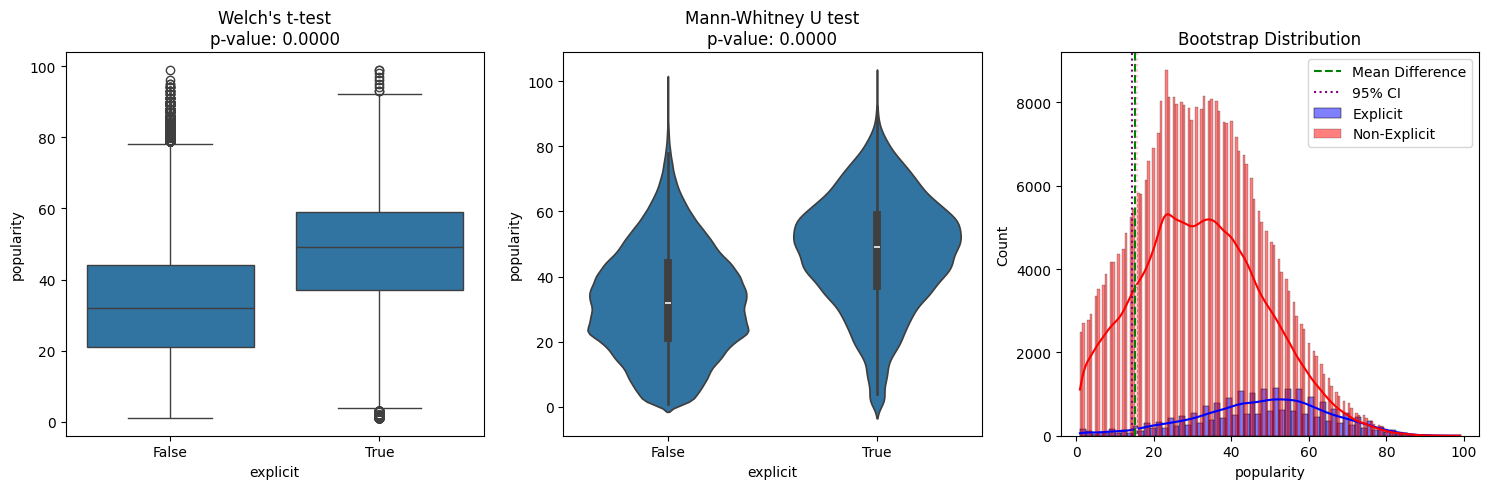

In [80]:

# Visualization
plt.figure(figsize=(15, 5))

# 1. Welch's t-test visualization
plt.subplot(131)
sns.boxplot(x='explicit', y='popularity', data=my_df)
plt.title(f"Welch's t-test\np-value: {t_p_value:.4f}")

# 2. Mann-Whitney U test visualization
plt.subplot(132)
sns.violinplot(x='explicit', y='popularity', data=my_df)
plt.title(f"Mann-Whitney U test\np-value: {u_p_value:.4f}")

# 3. Bootstrap visualization
plt.subplot(133)
sns.histplot(my_df[my_df['explicit'] == True]['popularity'], kde=True, color='blue', alpha=0.5, label='Explicit')
sns.histplot(my_df[my_df['explicit'] == False]['popularity'], kde=True, color='red', alpha=0.5, label='Non-Explicit')
plt.axvline(boot_mean, color='green', linestyle='--', label='Mean Difference')
plt.axvline(boot_ci[0], color='purple', linestyle=':', label='95% CI')
plt.axvline(boot_ci[1], color='pink', linestyle=':')
plt.legend()
plt.title("Bootstrap Distribution")

plt.tight_layout()
plt.show()

It seems like there is a connection between explicit content and the popularity of a song.

The difference between the average popularity of explicit and non-explicit songs is, on average, 15 points.

But let's see if there are no other factors that affect it. Since songs with explicit content are more common in later years, and popularity seems to be higher in later years (maybe due to the nature of the Spotify popularity algorithm), I want to see if the release year affects the popularity and not the explicitness.

##### Mean Popularity by Explicit Status Over release year

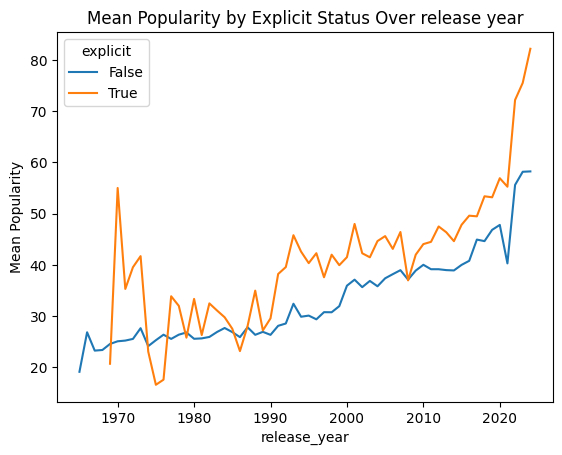

In [16]:
#Group by year and calculate the mean popularity for each group
yearwise_popularity = my_df.groupby(['release_year', 'explicit'])['popularity'].mean().unstack()
yearwise_popularity.plot(kind='line', title='Mean Popularity by Explicit Status Over release year')
plt.ylabel('Mean Popularity')
plt.show()

it seems that as of 2021 the explicit songs were more popular regradless to the realse year of the song.

#### conclusion

In 2021, songs with explicit content were more popular on average by 15 points than non-explicit songs. There is also an upward trend in releasing explicit content songs since around 1980.

Is 15 points a lot?

According to an online article I found:  
"A popularity score of 20 is often thought to be where you will start to get pushed onto Release Radar for people who are not following you. A popularity score of 30 is thought to be the score where you will start to get pushed onto the Discovery Weekly playlist by Spotify."

This may indicate that a 15-point difference is a significant gap.

*Note that the way the author of the database collected the songs may affect the results. 

*This does not mean that the explicitness of the song affects popularity, only that they were more popular in 2021. If we want to check the independent effect of explicit content on popularity, further statistical tests need to be done, preferably with an all-time popularity score and not only the current popularity score.

#### correlation map

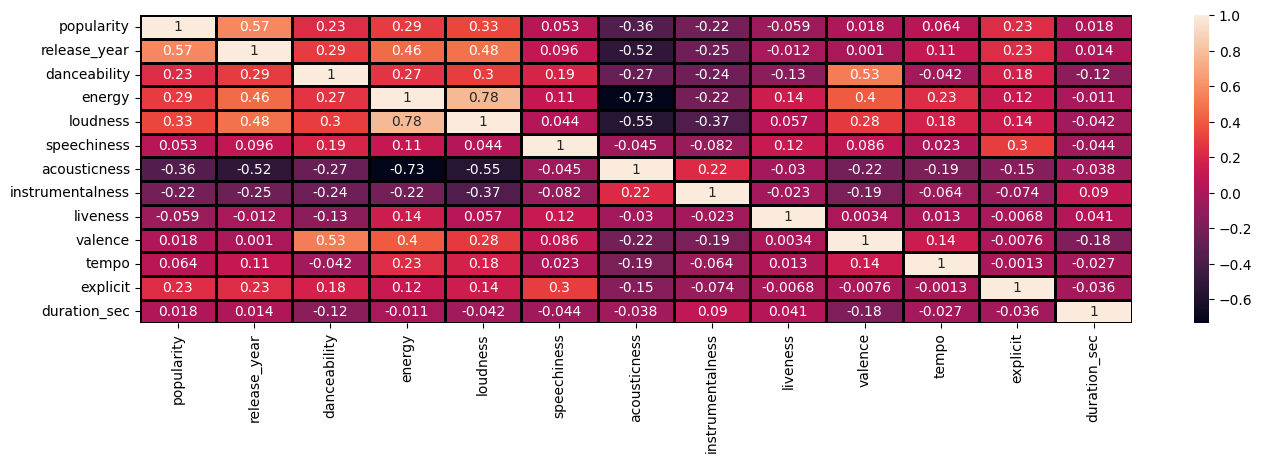

In [324]:
cor_Map_df = tracks_df.drop(["key","mode","genre","song_name","song_id","time_signature"],axis=1).corr(method="pearson")
plt.figure(figsize=(16,4))
heatmap = sns.heatmap(cor_Map_df,linecolor="black",linewidths=1,annot=True)
plt.show()

Other factors that have a somewhat positive correlation with popularity are danceability, energy, and loudness. It's interesting to note that these features also show similar positive correlation with the release year. This means that these features values tend to increase with time. Conversely, the features that have a somewhat negative correlation with popularity also show a similar negative correlation with the release year. This indicates that as the release year increases, these features values tend to decrease.

I wonder if thoes features become less popular because they are no longer realesd as much and since the populrity is based on recent activity of the track it also tend to decrese.  
or is it the other way around. the artists noticed the popular trend and started realesing less songs with that features. 

##### popularity, explicit and danceability

C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\256120262.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['danceability_binned'] = pd.cut(my_df['danceability'], bins=danceability_bins)
C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\256120262.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['danceability_binned'] = pd.cut(my_df['danceability'], bins=danceability_bins)


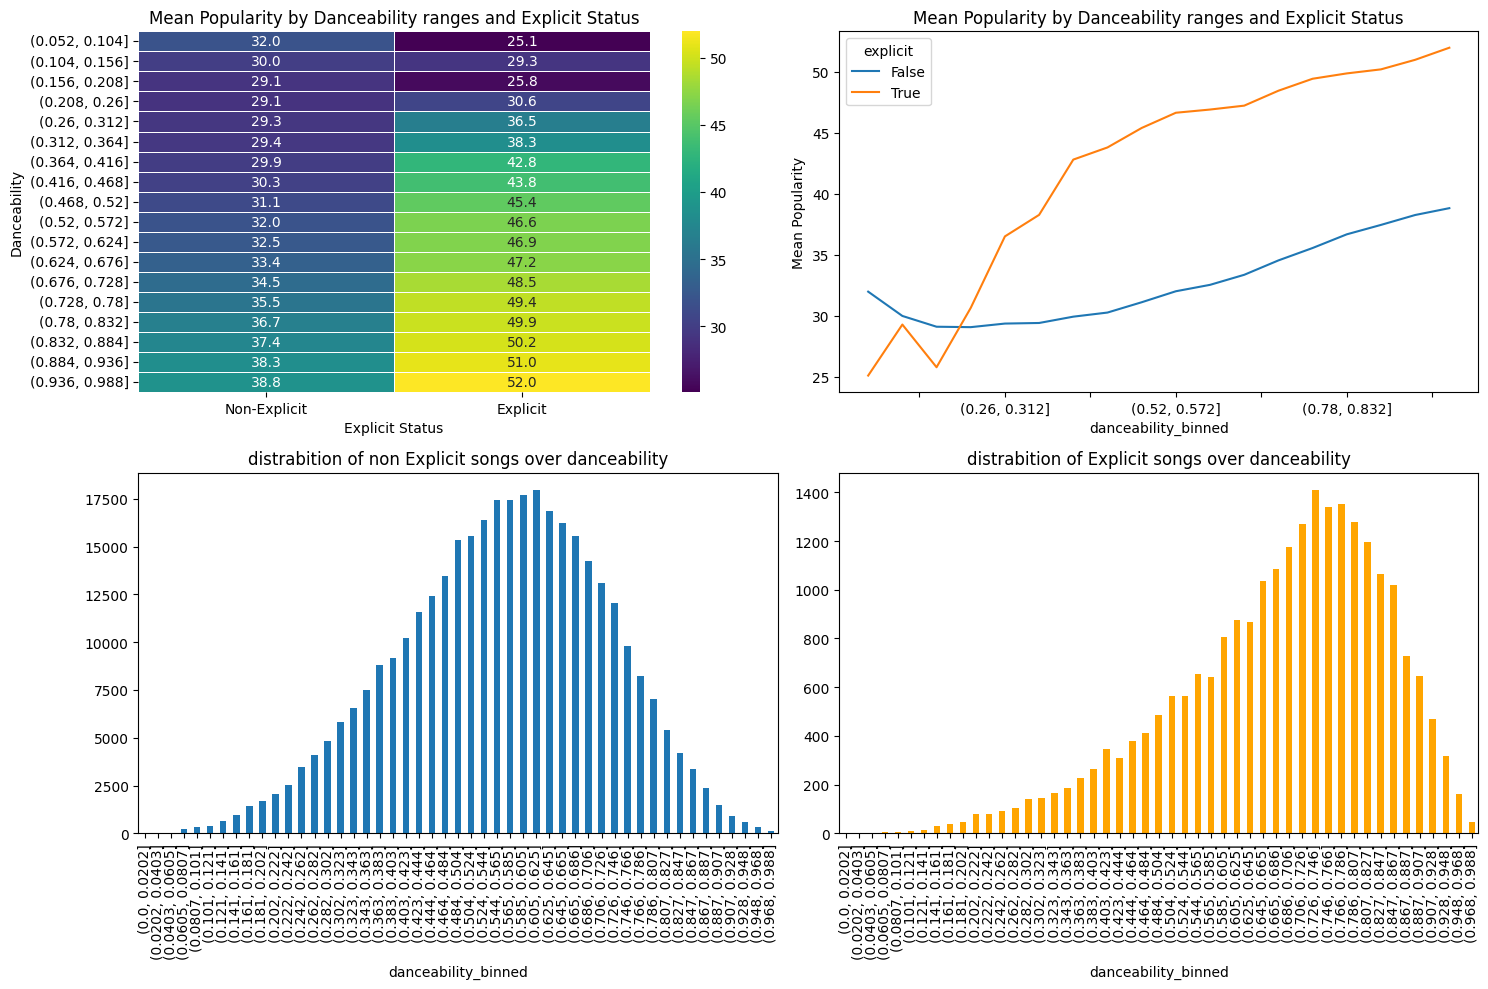

In [286]:
danceability_bins = np.linspace(my_df['danceability'].min(), my_df['danceability'].max(), 20)

# Assign each danceability value to a bin
my_df['danceability_binned'] = pd.cut(my_df['danceability'], bins=danceability_bins)

# Create a pivot table for the heatmap
heatmap_data = my_df.pivot_table(observed=False,index='danceability_binned', columns='explicit', values='popularity', aggfunc='mean').fillna(0)

fig,ax=plt.subplots(2,2,figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5, ax=ax[0][0])
ax[0][0].set_title('Mean Popularity by Danceability ranges and Explicit Status')
ax[0][0].set_xlabel('Explicit Status')
ax[0][0].set_ylabel('Danceability')
ax[0][0].set_xticks(ticks=[0.5, 1.5], labels=['Non-Explicit', 'Explicit'])

danceability_popularity = my_df.groupby(['danceability_binned', 'explicit'],observed=False)['popularity'].mean().unstack()
danceability_popularity.plot(kind='line', title='Mean Popularity by Danceability ranges and Explicit Status', ax=ax[0][1])
ax[0][1].set_ylabel('Mean Popularity')


danceability_bins = np.linspace(my_df['danceability'].min(), my_df['danceability'].max(), 50)
# Assign each danceability value to a bin
my_df['danceability_binned'] = pd.cut(my_df['danceability'], bins=danceability_bins)

danceability_explicit = my_df[my_df["explicit"]==False].groupby(['danceability_binned'],observed=False)['song_id'].size()
danceability_explicit.plot(kind='bar', title='distrabition of non Explicit songs over danceability', ax=ax[1][0])

danceability_explicit = my_df[my_df["explicit"]==True].groupby(['danceability_binned'],observed=False)['song_id'].size()
danceability_explicit.plot(kind='bar',color="orange", title='distrabition of Explicit songs over danceability', ax=ax[1][1])

plt.tight_layout()
plt.show()

from the graphs above you can see that even tho danceability has a correlation with popularity as well. the avg popularity of explicit songs are almost allways higher than non explicit across all danceability ranges. in addition the distrabition of explict vs non explicit songs over danceability ranges is not very diffrent. 
which indicates an indipendet correlation of explicitness and popularity.

C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\3306200752.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['energy_binned'] = pd.cut(my_df['energy'], bins=energy_bins)
C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\3306200752.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['energy_binned'] = pd.cut(my_df['energy'], bins=energy_bins)


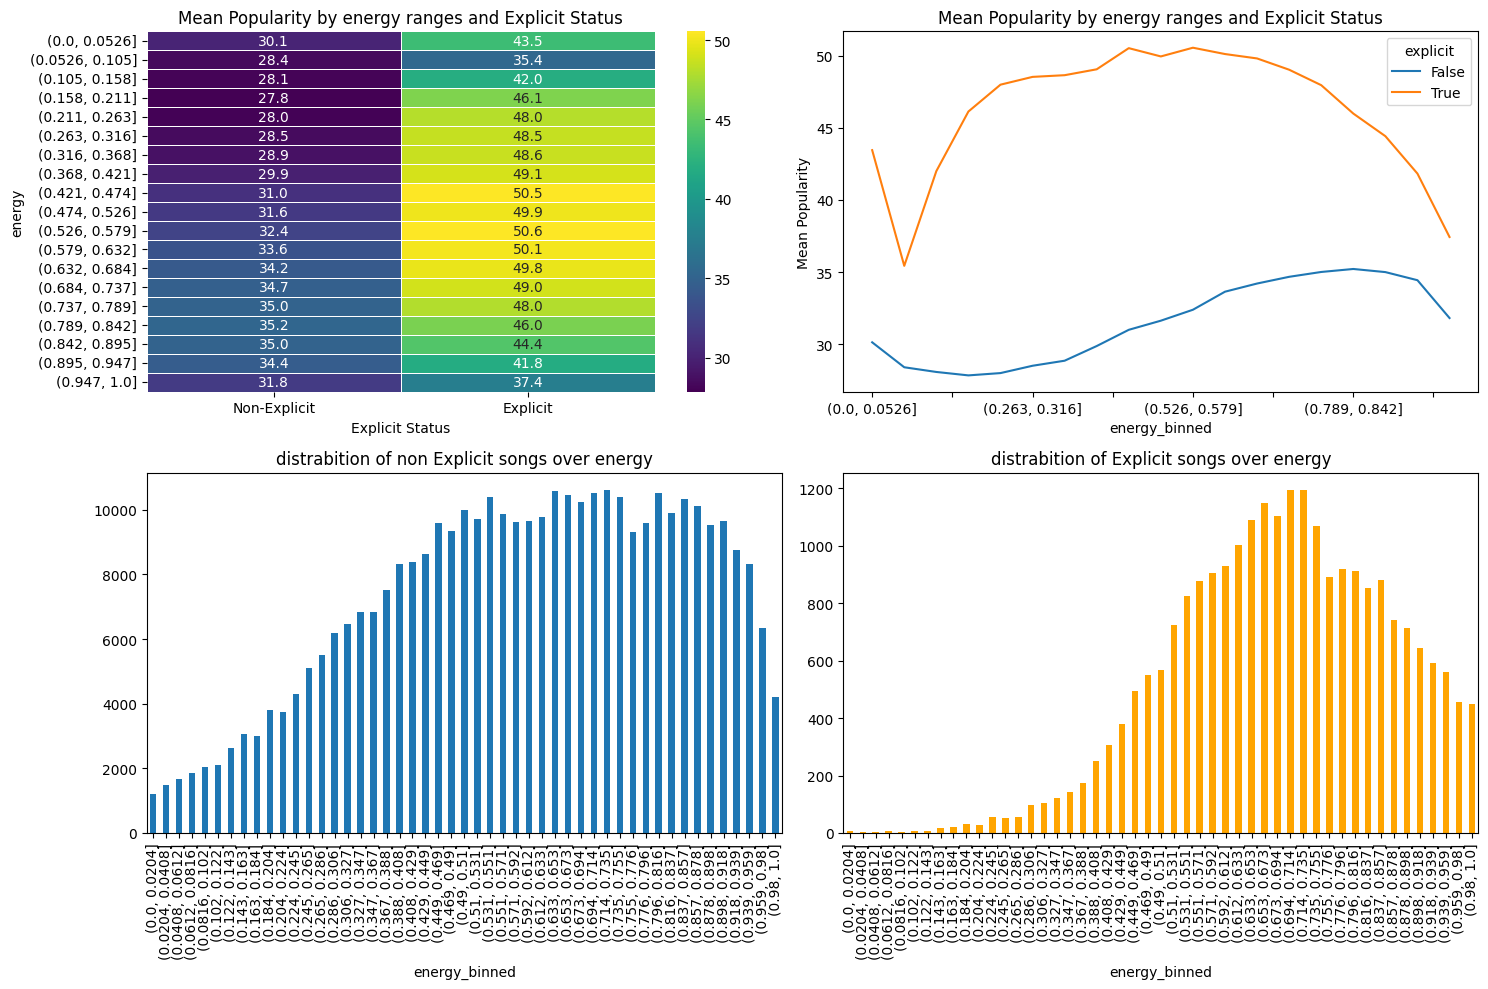

In [285]:
energy_bins = np.linspace(my_df['energy'].min(), my_df['energy'].max(), 20)

# Assign each danceability value to a bin
my_df['energy_binned'] = pd.cut(my_df['energy'], bins=energy_bins)

# Create a pivot table for the heatmap
heatmap_data = my_df.pivot_table(observed=False,index='energy_binned', columns='explicit', values='popularity', aggfunc='mean').fillna(0)

fig,ax=plt.subplots(2,2,figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5, ax=ax[0][0])
ax[0][0].set_title('Mean Popularity by energy ranges and Explicit Status')
ax[0][0].set_xlabel('Explicit Status')
ax[0][0].set_ylabel('energy')
ax[0][0].set_xticks(ticks=[0.5, 1.5], labels=['Non-Explicit', 'Explicit'])

danceability_popularity = my_df.groupby(['energy_binned', 'explicit'],observed=False)['popularity'].mean().unstack()
danceability_popularity.plot(kind='line', title='Mean Popularity by energy ranges and Explicit Status', ax=ax[0][1])
ax[0][1].set_ylabel('Mean Popularity')


energy_bins = np.linspace(my_df['energy'].min(), my_df['energy'].max(), 50)
# Assign each danceability value to a bin
my_df['energy_binned'] = pd.cut(my_df['energy'], bins=energy_bins)

danceability_explicit = my_df[my_df["explicit"]==False].groupby(['energy_binned'],observed=False)['song_id'].size()
danceability_explicit.plot(kind='bar', title='distrabition of non Explicit songs over energy', ax=ax[1][0])

danceability_explicit = my_df[my_df["explicit"]==True].groupby(['energy_binned'],observed=False)['song_id'].size()
danceability_explicit.plot(kind='bar',color="orange", title='distrabition of Explicit songs over energy', ax=ax[1][1])

plt.tight_layout()
plt.show()

from the graphs above you can see that the avg popularity of explicit songs is allways higher than non explicit across all energy ranges. in addition the distrabition of explict vs non explicit songs over danceability ranges is a bit diffrent. 
which indicates that some of the correlation of explicitness and popularity may be effected by certain energy ranges being more popular. but since the distrabition is not completly diffrent there is problably still a small indipndaant effect of explictiness.

C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\3797218500.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['loudness_binned'] = pd.cut(my_df['loudness'], bins=loudness_bins)
C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\3797218500.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['loudness_binned'] = pd.cut(my_df['loudness'], bins=loudness_bins)


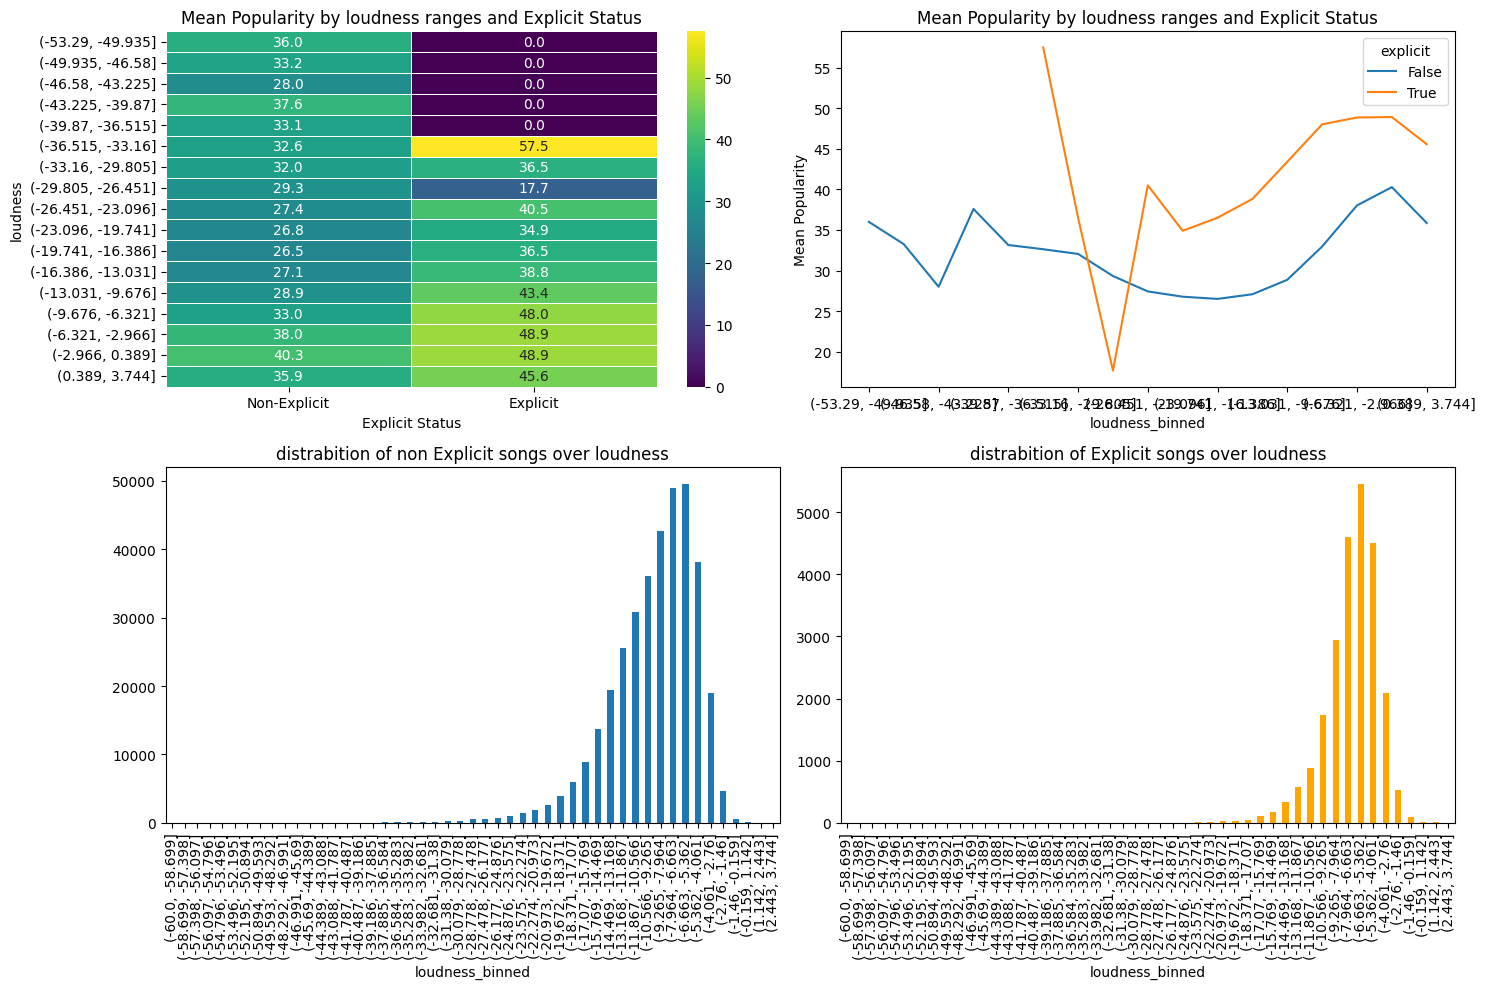

In [287]:
loudness_bins = np.linspace(my_df['loudness'].min(), my_df['loudness'].max(), 20)

# Assign each danceability value to a bin
my_df['loudness_binned'] = pd.cut(my_df['loudness'], bins=loudness_bins)

# Create a pivot table for the heatmap
heatmap_data = my_df.pivot_table(observed=False,index='loudness_binned', columns='explicit', values='popularity', aggfunc='mean').fillna(0)

fig,ax=plt.subplots(2,2,figsize=(15, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".1f", linewidths=.5, ax=ax[0][0])
ax[0][0].set_title('Mean Popularity by loudness ranges and Explicit Status')
ax[0][0].set_xlabel('Explicit Status')
ax[0][0].set_ylabel('loudness')
ax[0][0].set_xticks(ticks=[0.5, 1.5], labels=['Non-Explicit', 'Explicit'])

loudness_popularity = my_df.groupby(['loudness_binned', 'explicit'],observed=False)['popularity'].mean().unstack()
loudness_popularity.plot(kind='line', title='Mean Popularity by loudness ranges and Explicit Status', ax=ax[0][1])
ax[0][1].set_ylabel('Mean Popularity')


loudness_bins = np.linspace(my_df['loudness'].min(), my_df['loudness'].max(), 50)
# Assign each danceability value to a bin
my_df['loudness_binned'] = pd.cut(my_df['loudness'], bins=loudness_bins)

loudness_explicit = my_df[my_df["explicit"]==False].groupby(['loudness_binned'],observed=False)['song_id'].size()
loudness_explicit.plot(kind='bar', title='distrabition of non Explicit songs over loudness', ax=ax[1][0])

loudness_explicit = my_df[my_df["explicit"]==True].groupby(['loudness_binned'],observed=False)['song_id'].size()
loudness_explicit.plot(kind='bar',color="orange", title='distrabition of Explicit songs over loudness', ax=ax[1][1])

plt.tight_layout()
plt.show()

from the graphs above you can see that even tho loudness has a correlation with popularity as well. the avg popularity of explicit songs are almost allways higher than non explicit across all loudness ranges. in addition the distrabition of explict vs non explicit songs over loudness ranges is quit similar. 
which indicates an indipendet correlation of explicitness and popularity.

In [ ]:
##### multi regression line 

### more fun insights

In [64]:
explicit_prec_genre=(my_df.loc[my_df["explicit"]==True].groupby(['genre']).size()/my_df.groupby(['genre']).size()*100).fillna(0).sort_values(ascending=False)

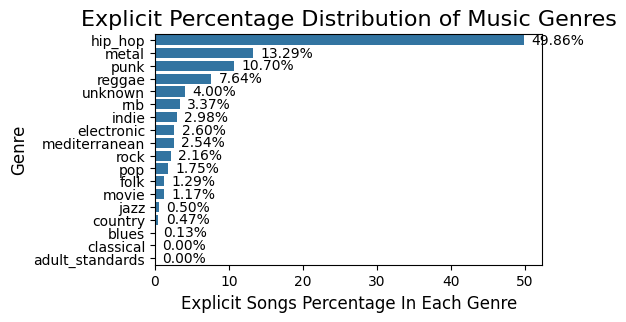

In [72]:
plt.figure(figsize=(5,3))
sns.barplot(x=explicit_prec_genre.values, y=explicit_prec_genre.index)
plt.title('Explicit Percentage in Music Genres', fontsize=16)
plt.xlabel('Explicit Songs Percentage In Each Genre', fontsize=12)
plt.ylabel('Genre', fontsize=12)
for i, percentage in enumerate(explicit_prec_genre):
    plt.text(percentage + 1, i, f'{percentage:.2f}%', va='center')
plt.show()

Text(0.5, 1.0, 'mean popularity of explicit vs non explicit songs over genres')

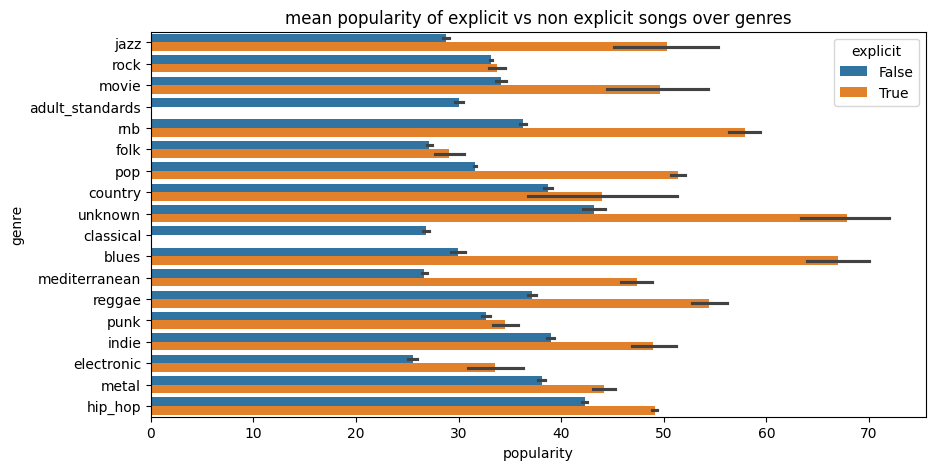

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(data=my_df,y="genre",x="popularity",hue="explicit")
plt.title("mean popularity of explicit vs non explicit songs over genres")
plt.show()

In [76]:
import matplotlib.cm as cm
norm = plt.Normalize(tracks_df['duration_sec'].min(), tracks_df['duration_sec'].max())
colors = cm.Blues(norm(tracks_df['duration_sec']))

C:\Users\Mbtpem\AppData\Local\Temp\ipykernel_1952\2107622664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tracks_df, y='genre', x='duration_sec',


Text(0, 0.5, 'genre')

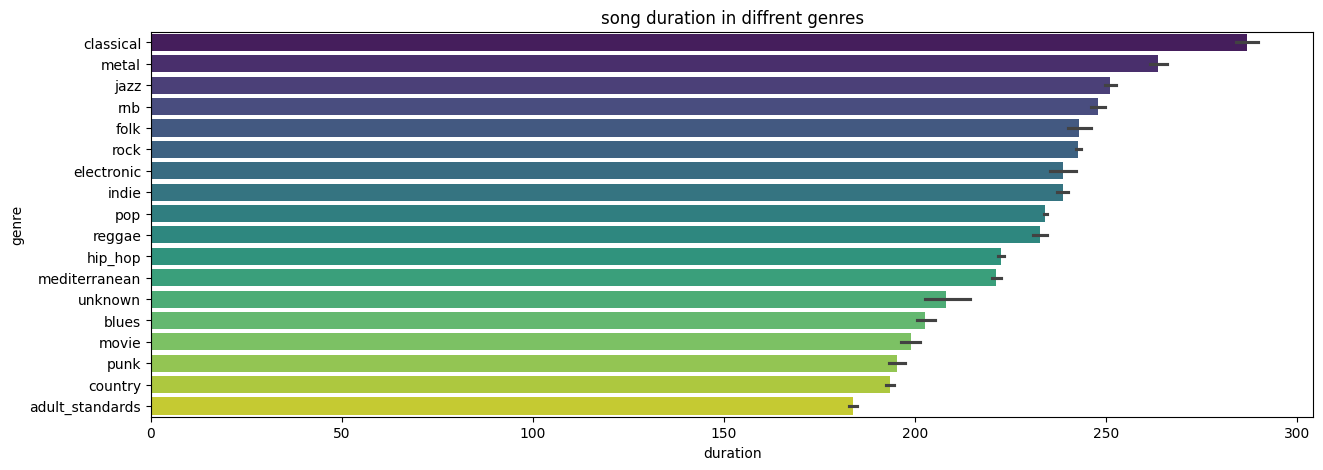

In [78]:
duration_sec_mean= tracks_df.groupby('genre')['duration_sec'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 5))
plt.title("song duration in diffrent genres")
sns.barplot(data=tracks_df, y='genre', x='duration_sec',
            order=duration_sec_mean.index,
            palette="viridis")
plt.xlabel("duration")
plt.ylabel("genre")
plt.show()

In the last part of the analysis, I wanted to compare my listening behavior to a variety of genres. Using Spotify's API, I will be using my account's top 50 played songs to represent my personal "music genre".  
I also gathered data from the tracks data frame I created to get the music genres.  
note that the way I matched a song to a genre in this data base is based on the artist genres list I got from the API because Spotifiy API wont show a song genre.  
*to see how I did it go to the "Creating_Database" file.

Below, I have visualized each the aforementioned "music genres" on their average values for each of Spotify's 6 key track features.  
You can toggle the layers by clicking in the legend.  
I will import this as an html file since Jupyter notebook does not seems to support it.  
and also to use it on linkdin.

When toggling between the genres, it is evident that my personal taste's distribution is most similar to that of mediterranean and pop. The only discernible differences are in valence.

In [436]:
average_by_genre = tracks_df[["genre","danceability","acousticness","energy","speechiness","valence","instrumentalness"]].groupby('genre').mean().reset_index()
avg_my_top_tracks=my_top_tracks_df[["danceability","acousticness","energy","speechiness","valence","instrumentalness"]].mean()
avg_my_top_tracks=avg_my_top_tracks.to_frame().T
avg_my_top_tracks.loc[0,"genre"]="my top 50"
average_by_genre=pd.concat([average_by_genre, avg_my_top_tracks], ignore_index=True)
categories = ["danceability","acousticness","energy","speechiness","valence","instrumentalness"]

fig = go.Figure()

for index, row in average_by_genre.iterrows():
    genre = row['genre']
    values = row[categories].tolist()

    if (genre == "my top 50"):
        fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories,
        fill='toself',
        name=genre
    ))
    else:
        fig.add_trace(go.Scatterpolar(
            r=values,
            theta=categories,
            fill='toself',
            name=genre,
            visible= "legendonly"

        ))

fig.update_layout(
    width=700,
    height=550,
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    title='Interactive Radar Chart Of Audio Features By Genre ',
    legend=dict(
        x=1,
        y=0.4,
        traceorder='normal',
        orientation='v',
        bordercolor='Black',
        borderwidth=1
    ),
    showlegend=True
)
fig.write_html('interactive_radar_chart_by_genre.html')